# Explainable-AI model on iDetect dataset:

In [41]:
import pandas as pd
import numpy as np
import re, os
from string import printable
from sklearn import model_selection
import tensorflow as tf
from keras.models import Sequential, Model, model_from_json, load_model
from keras import regularizers
from keras.layers.core import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import Input, ELU, LSTM, Embedding, Convolution2D, MaxPooling2D, \
BatchNormalization, Convolution1D, MaxPooling1D, concatenate
from keras.preprocessing import sequence
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras import backend as K
from pathlib import Path
import json
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from keras.layers import Bidirectional, SimpleRNN
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard, ModelCheckpoint
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.pipeline import make_pipeline
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from sklearn.pipeline import TransformerMixin
from sklearn.base import BaseEstimator

# <guru> Newly added API calls
from keras.utils import pad_sequences

In [3]:
df = pd.read_csv('../data/iDetect_refine/DNN_Binary.csv', encoding='unicode_escape')
df.head(3)

,code,isMalicious
0,( strlen ( me ),1
1,*pBuffer = MQTT_PACKET_TYPE_CONNECT ; pBuffer...,1
2,*pBuffer1 = MQTT_PACKET_TYPE_CONNECT1 ; pBuff...,1


In [13]:

def tokenize_data(df):
    """ Dataset tokenization
    """
    code_snippet_int_tokens = [[printable.index(x) + 1 for x in code_snippet if x in printable] 
                            for code_snippet in df.code]
    max_len = 150
    # X = sequence.pad_sequences(code_snippet_int_tokens, maxlen=max_len) # original
    X = pad_sequences(code_snippet_int_tokens, maxlen=max_len)
    target = np.array (df.isMalicious)
    print('Matrix dimensions of X: ', X.shape, 'Vector dimension of target: ', target.shape)
    return X

X = tokenize_data(df)
#Split the data set into training and test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size=0.30, random_state=30)

Matrix dimensions of X:  (4720, 150) Vector dimension of target:  (4720,)


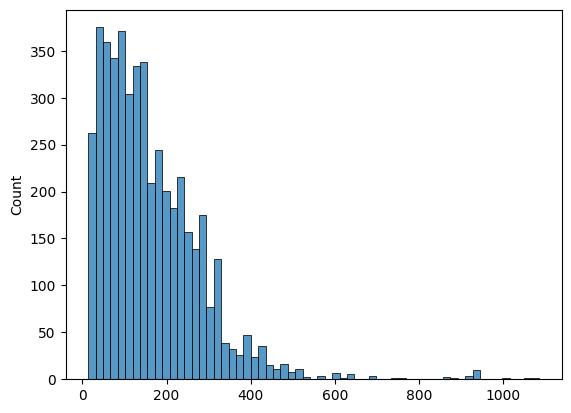

In [26]:
def plot_hist(df):
    """ plot histplot of the code length 
    """
    len_arr = []
    for i in range(len(df)):
        len_arr.append(len(df.loc[i,'code']))
    sns.histplot(len_arr)

plot_hist(df)

In [47]:
import tensorflow as tf 


seed = 101 # fix random seed for reproducibility
np.random.seed(seed)
tf.random.set_seed(seed)

class TextsToSequences(Tokenizer, BaseEstimator, TransformerMixin):
    """ Sklearn transformer to convert texts to indices list 
    (e.g. [["the cute cat"], ["the dog"]] -> [[1, 2, 3], [1, 4]])"""
    def __init__(self,  **kwargs):
        super().__init__(**kwargs)
        
    def fit(self, texts, y=None):
        self.fit_on_texts(texts)
        return self
    
    def transform(self, texts, y=None):
        return np.array(self.texts_to_sequences(texts))
        
sequencer = TextsToSequences(num_words=vocab_size)

class Padder(BaseEstimator, TransformerMixin):
    """ Pad and crop uneven lists to the same length. 
    Only the end of lists longernthan the maxlen attribute are
    kept, and lists shorter than maxlen are left-padded with zeros
    
    Attributes
    ----------
    maxlen: int
        sizes of sequences after padding
    max_index: int
        maximum index known by the Padder, if a higher index is met during 
        transform it is transformed to a 0
    """
    def __init__(self, maxlen=500):
        self.maxlen = maxlen
        self.max_index = None
        
    def fit(self, X, y=None):
        self.max_index = pad_sequences(X, maxlen=self.maxlen).max()
        return self
    
    def transform(self, X, y=None):
        X = pad_sequences(X, maxlen=self.maxlen)
        X[X > self.max_index] = 0
        return X

padder = Padder(maxlen)

def create_model(max_features):
    """ Model creation function: returns a compiled LSTM"""
    model = Sequential()
    model.add(Embedding(max_features, 128))
    model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model



vocab_size = 20000  # Max number of different word, i.e. model input dimension
maxlen = 80  # Max number of words kept at the end of each text
batch_size = 128
max_features = vocab_size + 1


# Use Keras Scikit-learn wrapper to instantiate a LSTM with all methods
# required by Scikit-learn for the last step of a Pipeline
sklearn_lstm = KerasClassifier(build_fn=create_model, epochs=2, batch_size=batch_size, 
                               max_features=max_features, verbose=1)

# Build the Scikit-learn pipeline
pipeline = make_pipeline(sequencer, padder, sklearn_lstm)

print(pipeline)
pipeline.fit(X_train, y_train)



Pipeline(steps=[('textstosequences', TextsToSequences()),
                ('padder', Padder(maxlen=80)),
                ('kerasclassifier',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f8791378040>)])


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [2]:
import keras

keras.___version__

AttributeError: module 'keras' has no attribute '___version__'

In [22]:
import keras; 
if int(keras.__version__.split('.')[0])>=2:
    


True